### Questão 6

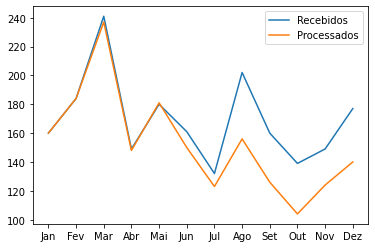

In [25]:
import matplotlib.pyplot as plt
import numpy as np

received = [160, 184, 241, 149, 180, 161, 132, 202, 160, 139, 149, 177]
processed = [160, 184, 237, 148, 181, 150, 123, 156, 126, 104, 124, 140]
labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.plot(labels, received, label="Recebidos")
plt.plot(labels, processed, label="Processados")

plt.legend()
plt.show()

### Questão 7

In [26]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

columns = ['sent', 'class']
rows = []

rows = [['They are novels', 'stmt'],
        ['have you read this book', 'question'],
        ['who is the author', 'question'],
        ['what are the characters', 'question'],
        ['This is how I bought the book', 'stmt'],
        ['I like fictions', 'stmt'],
        ['what is your favorite book', 'question'],
        ['This is my book', 'stmt']]

training_data = pd.DataFrame(rows, columns=columns)

training_data

,sent,class
0,They are novels,stmt
1,have you read this book,question
2,who is the author,question
3,what are the characters,question
4,This is how I bought the book,stmt
5,I like fictions,stmt
6,what is your favorite book,question
7,This is my book,stmt


In [27]:
stmt_docs = [row['sent']
             for index, row in training_data.iterrows() if row['class'] == 'stmt']

question_docs = [row['sent']
          for index, row in training_data.iterrows() if row['class'] == 'question']

vec_s = CountVectorizer()
vec_q = CountVectorizer()

X_s = vec_s.fit_transform(stmt_docs)
X_q = vec_q.fit_transform(question_docs)

word_list_s = vec_s.get_feature_names()
count_list_s = X_s.toarray().sum(axis=0)

freq_s = dict(zip(word_list_s, count_list_s))

word_list_q = vec_q.get_feature_names()
count_list_q = X_q.toarray().sum(axis=0)

freq_q = dict(zip(word_list_q, count_list_q))

docs = [row['sent'] for index, row in training_data.iterrows()]

vec = CountVectorizer()

X = vec.fit_transform(docs)

total_features = len(vec.get_feature_names())

In [28]:
phrase = 'what do you mean'
new_word_list = word_tokenize(phrase)

prob_s, prob_q = [], []
for word in new_word_list:
    if word in freq_s.keys():
        count = freq_s[word]
    else:
        count = 0
    prob_s.append((count + 1)/(count_list_s.sum(axis=0) + total_features))

for word in new_word_list:
    if word in freq_q.keys():
        count = freq_q[word]
    else:
        count = 0
    prob_q.append((count + 1)/(count_list_q.sum(axis=0) + total_features))

pq = .5;
for value in prob_q:
    pq *= value
    
ps = .5;
for value in prob_s:
    ps *= value
    
phrase, 'stmt' if ps > pq else 'question'

('what do you mean', 'question')

### Questão 8

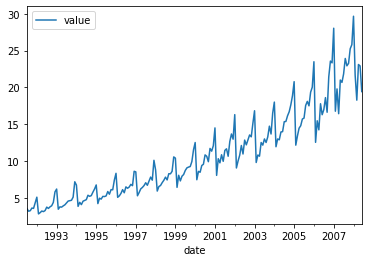

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Drugs.csv", parse_dates=['date'], index_col="date")

df.plot()

plt.show()

A análise da série temporal aponta uma tendência de crescimento no consumo de drogas ao longo dos anos. Além disso, é possível detectar ainda uma sazonalidade no aumento do consumo ao decorrer dos meses.